<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Elizabeth! Congratulations on submitting another project! 🎉  I will be using the standard color marking. 
   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully analyzed the distributions and wrote conclusions in the EDA section, normalized the `review` column, employed advanced techniques such as lemmatization and vectorizing, trained multiple models including a dummy baseline, and applied the `evaluate_model()` method for their assessment. Great job! The results look very good.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 

        
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, great job! 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. The models were trained and evaluated correctly. Please do not worry about Bert, we indeed do not need to run it here. 
    
I've left several comments, but I do not have any questions, so the project is accepted. 


<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
Congratulations and good luck! </div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import torch
import transformers

import re
import spacy

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()
display(df_reviews.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
45775,tt0275067,movie,Wendigo,Wendigo,2001,\N,91,0,"Horror,Mystery,Thriller",5.0,3883,Anyone who actually had the ability to sit thr...,1,neg,0,train,2472
31809,tt0221563,movie,Sorted,Sorted,2000,\N,102,0,Thriller,6.2,1076,There were so many reasons why this movie coul...,3,neg,0,test,1971
28534,tt0134154,movie,Ride with the Devil,Ride with the Devil,1999,\N,138,0,"Drama,Romance,War",6.7,12730,The War Between the States was perhaps the dar...,8,pos,1,train,4405
20585,tt0065989,movie,Little Fauss and Big Halsy,Little Fauss and Big Halsy,1970,\N,99,0,Drama,6.0,1020,"A genuinely odd, surreal jumble of visual idea...",3,neg,0,test,12257
21684,tt0329354,movie,Marigold,Marigold,2007,\N,110,0,"Comedy,Romance",4.8,1789,I just finished watching Marigold today and I'...,10,pos,1,test,10608


In [6]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [7]:
#address missing values
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [8]:
#drop missing values as they are such a small amount
df_reviews = df_reviews.dropna()

In [9]:
#fix data types (votes to int64)

df_reviews['votes'].astype(int)
print(df_reviews['votes'].dtype)

Int64


In [10]:
df_reviews.duplicated().sum()

0

Now our data is ready to analyze.  There are some columns, such as end_year that have a lot of missing values labeled with //N. Once we get into our analysis we can determine if it is worth digging into these valuse more for our model. 

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Yes, it is very imporant to check data for the duplicates. Very good! 
    

</div>

## EDA

Let's check the number of movies and reviews over years.

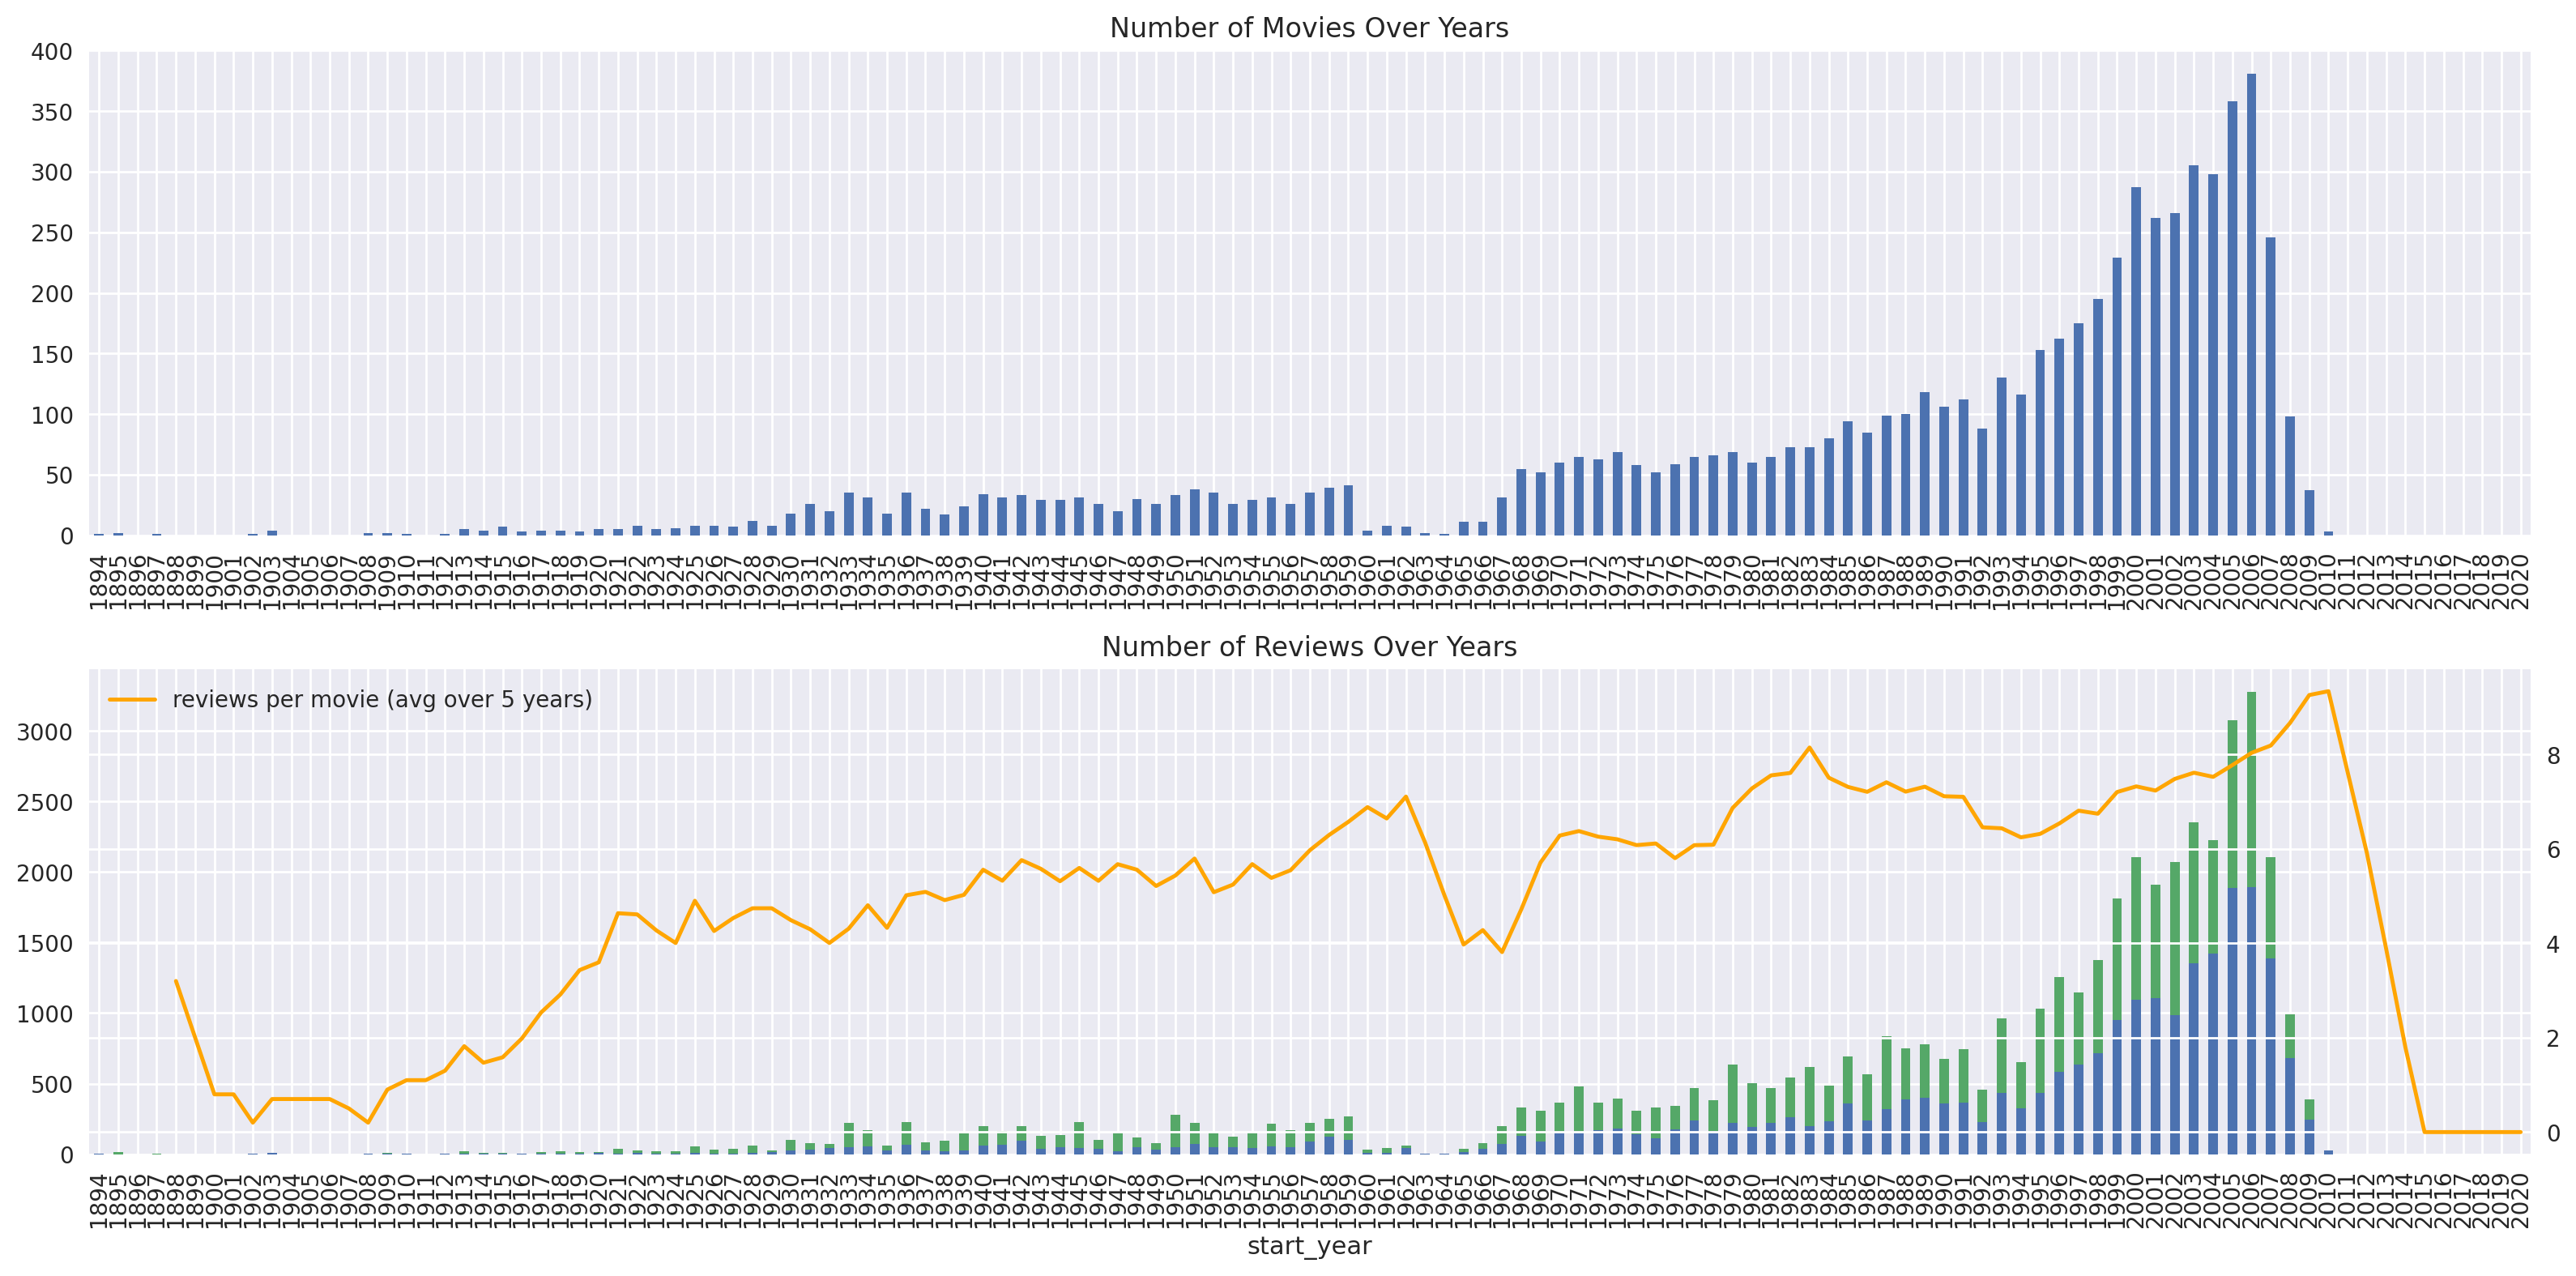

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

These charts show a big increase in the number of reviews per movie starting in the early 1990s as the VHS format was becoming more accessible and DVDs were introduced into the market (1996).

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
So we can see a steady increase in the number of movies. The average number of reviews also increases.

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

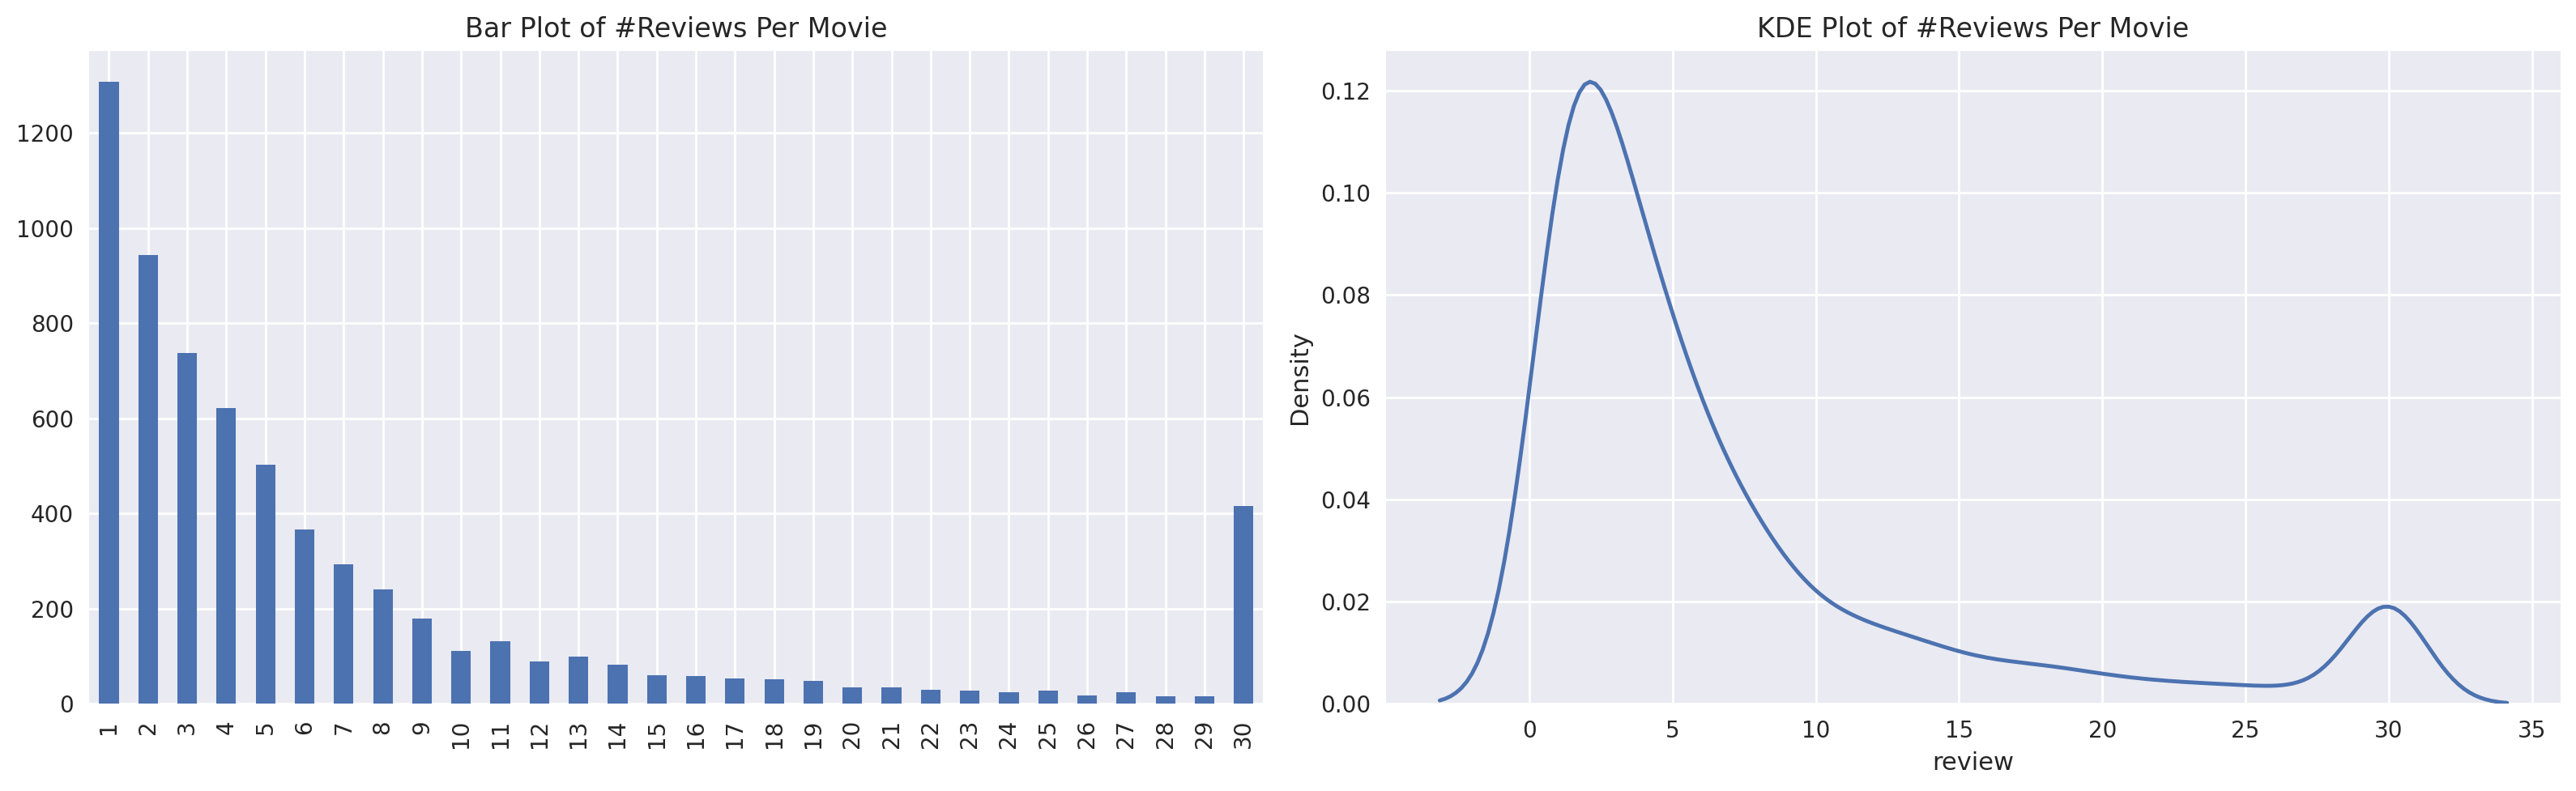

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

These show us the frequency of reviews per movie. Most movies have less than 5 reviews, but there are outliers with some movies that have up to 30 reviews.  Therefore the data is skewed to the left. This could lead to class imbalancing or another type of 'skewness' depending on the type of review (negative vs positive).

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Correct. 
</div>

In [13]:
#check class balance of our pos column
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

At first glance it seems that the difference between the number of positive and negative reviews is fairly small across the whole data set.  Now we will compare across our training and test set from the ds_part column.

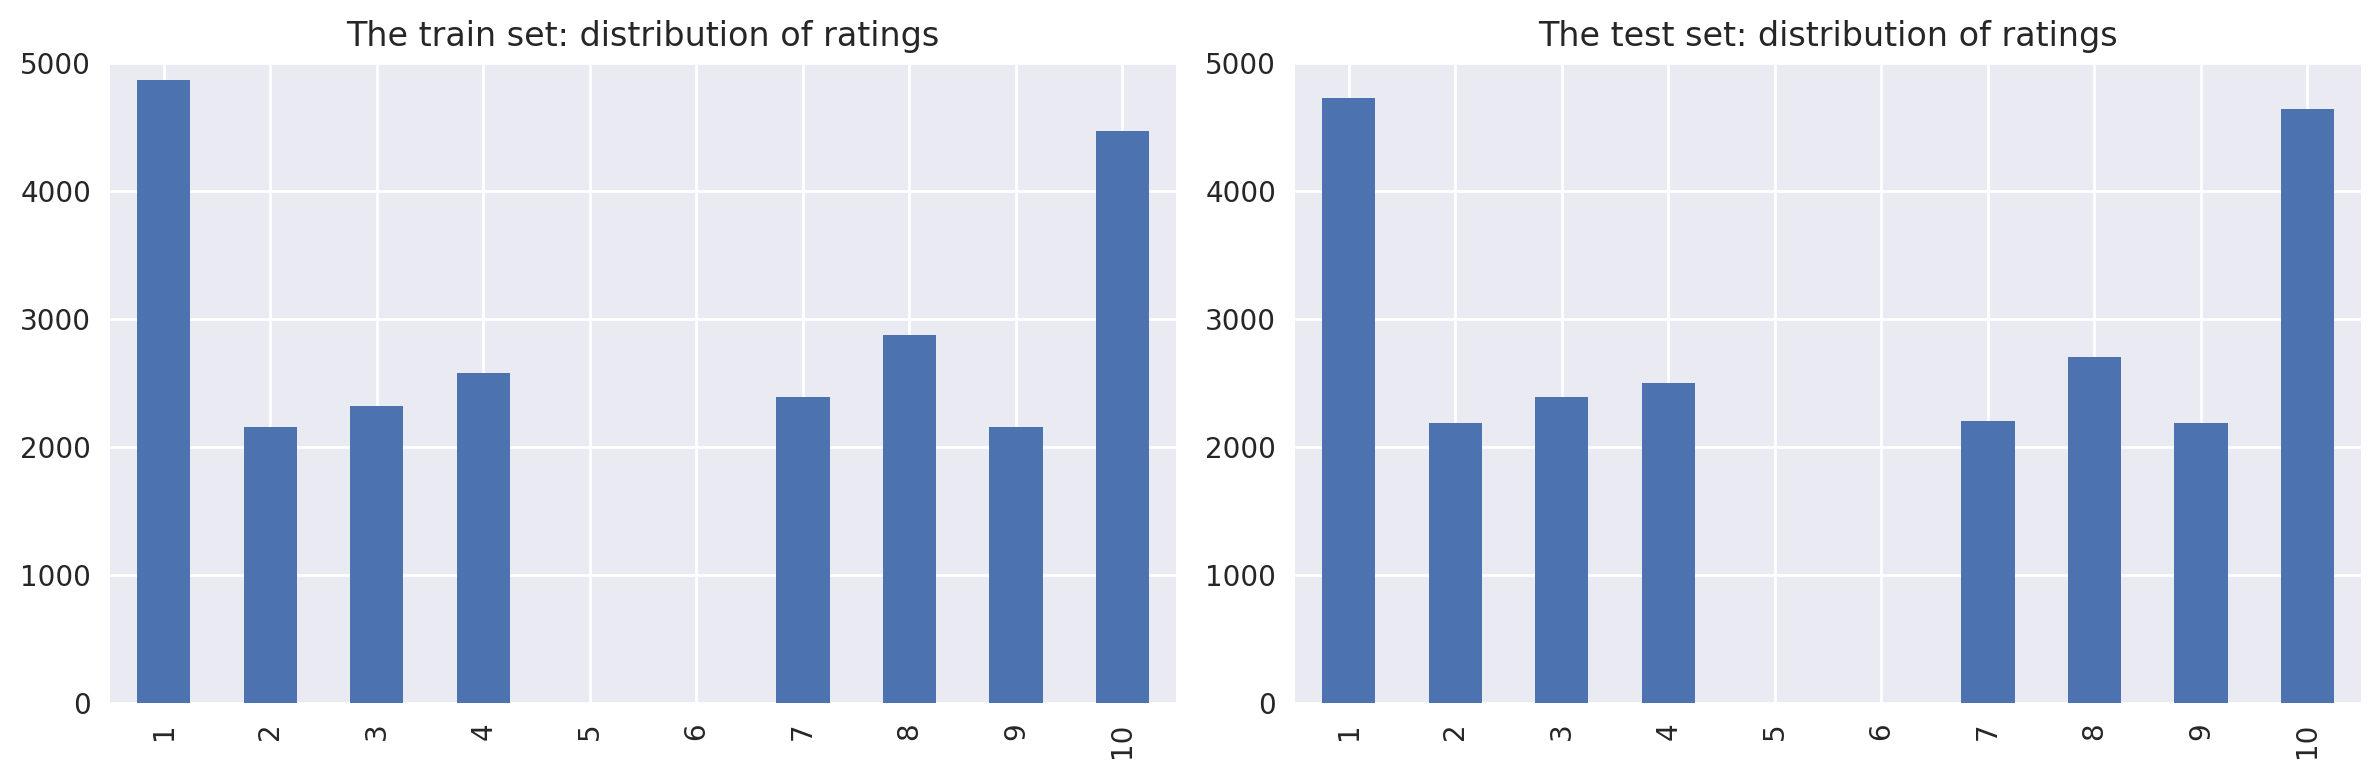

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

As we can see from these bar graphs, the distribution of positive and negative reviews for both our training and test set seem relatively similar, so we can move forward assuming that the classes are balanced. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Agreed. 

</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


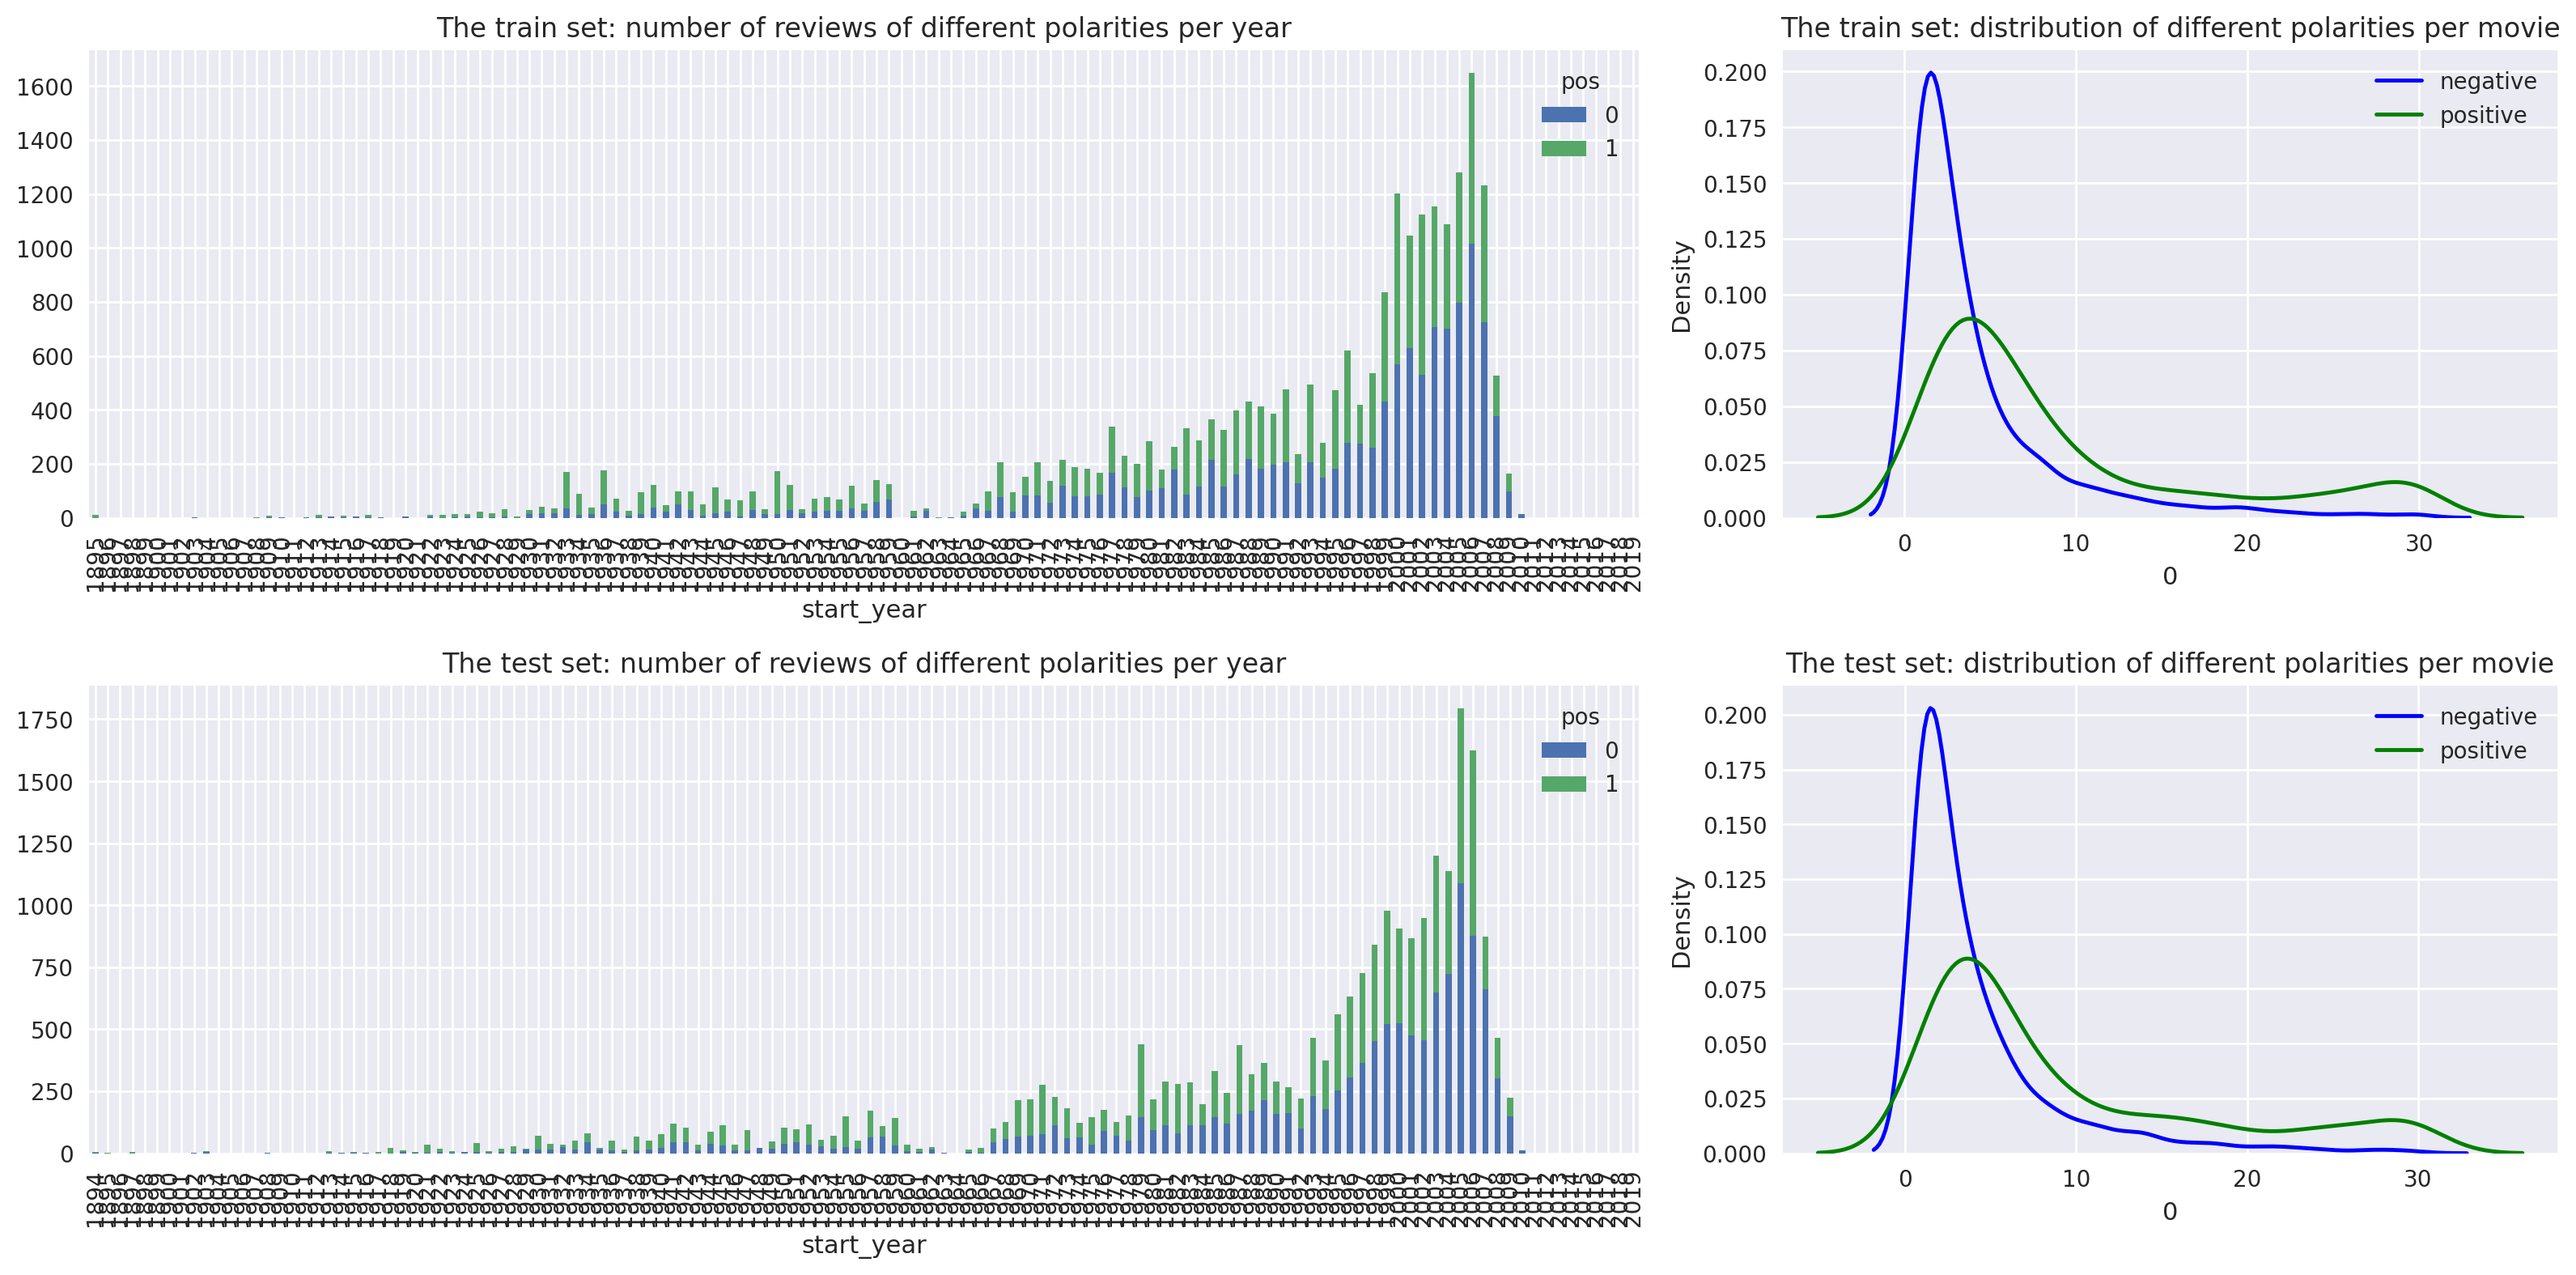

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

As we can see from the charts above, the distribution of polarities are similar across both our training and test sets.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Well done! 
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [16]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
I know it was in the precode, but it is a great opportunity to point out the following: 

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that the **type** veriable is green in the function above. When we see that your variables are green, we should think of another name, since green color indicates that this name is reserved in python. 
    
    
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [17]:
def normalize(review):

    pattern = r"[^a-zA-Z' ]"
    review = re.sub(pattern, '', review)
    
    return " ".join(review.split())

df_reviews['review_norm'] = df_reviews['review'].apply(normalize)

In [18]:
df_reviews['review_norm'].head(5)

0    The pakage implies that Warren Beatty and Gold...
1    How the hell did they get this made Presenting...
2    There is no real story the film seems more lik...
3    Um a serious film about troubled teens in Sing...
4    I'm totally agree with GarryJohal from Singapo...
Name: review_norm, dtype: object

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code! If we don't normalize the data, punctuation and digits can create useless tokens such as '12' or '!!', thus increasing dimensionality without adding value. As a result, it may reduce the model's generalization ability.

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [19]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

train_features = df_reviews_train['review_norm']
test_features = df_reviews_test['review_norm']

print("df_reviews_train:", df_reviews_train.shape)
print("df_reviews_test", df_reviews_test.shape)
print("")
print("train_features:", train_features.shape)
print("train_target:", train_target.shape)
print("")
print("test_features:", test_features.shape)
print("test_target", test_target.shape)

df_reviews_train: (23796, 18)
df_reviews_test (23533, 18)

train_features: (23796,)
train_target: (23796,)

test_features: (23533,)
test_target (23533,)


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Correct. 

</div>

In [20]:
#set random state for all our models
random_state = 12345

## Working with models

### Model 0 - Constant

In [21]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


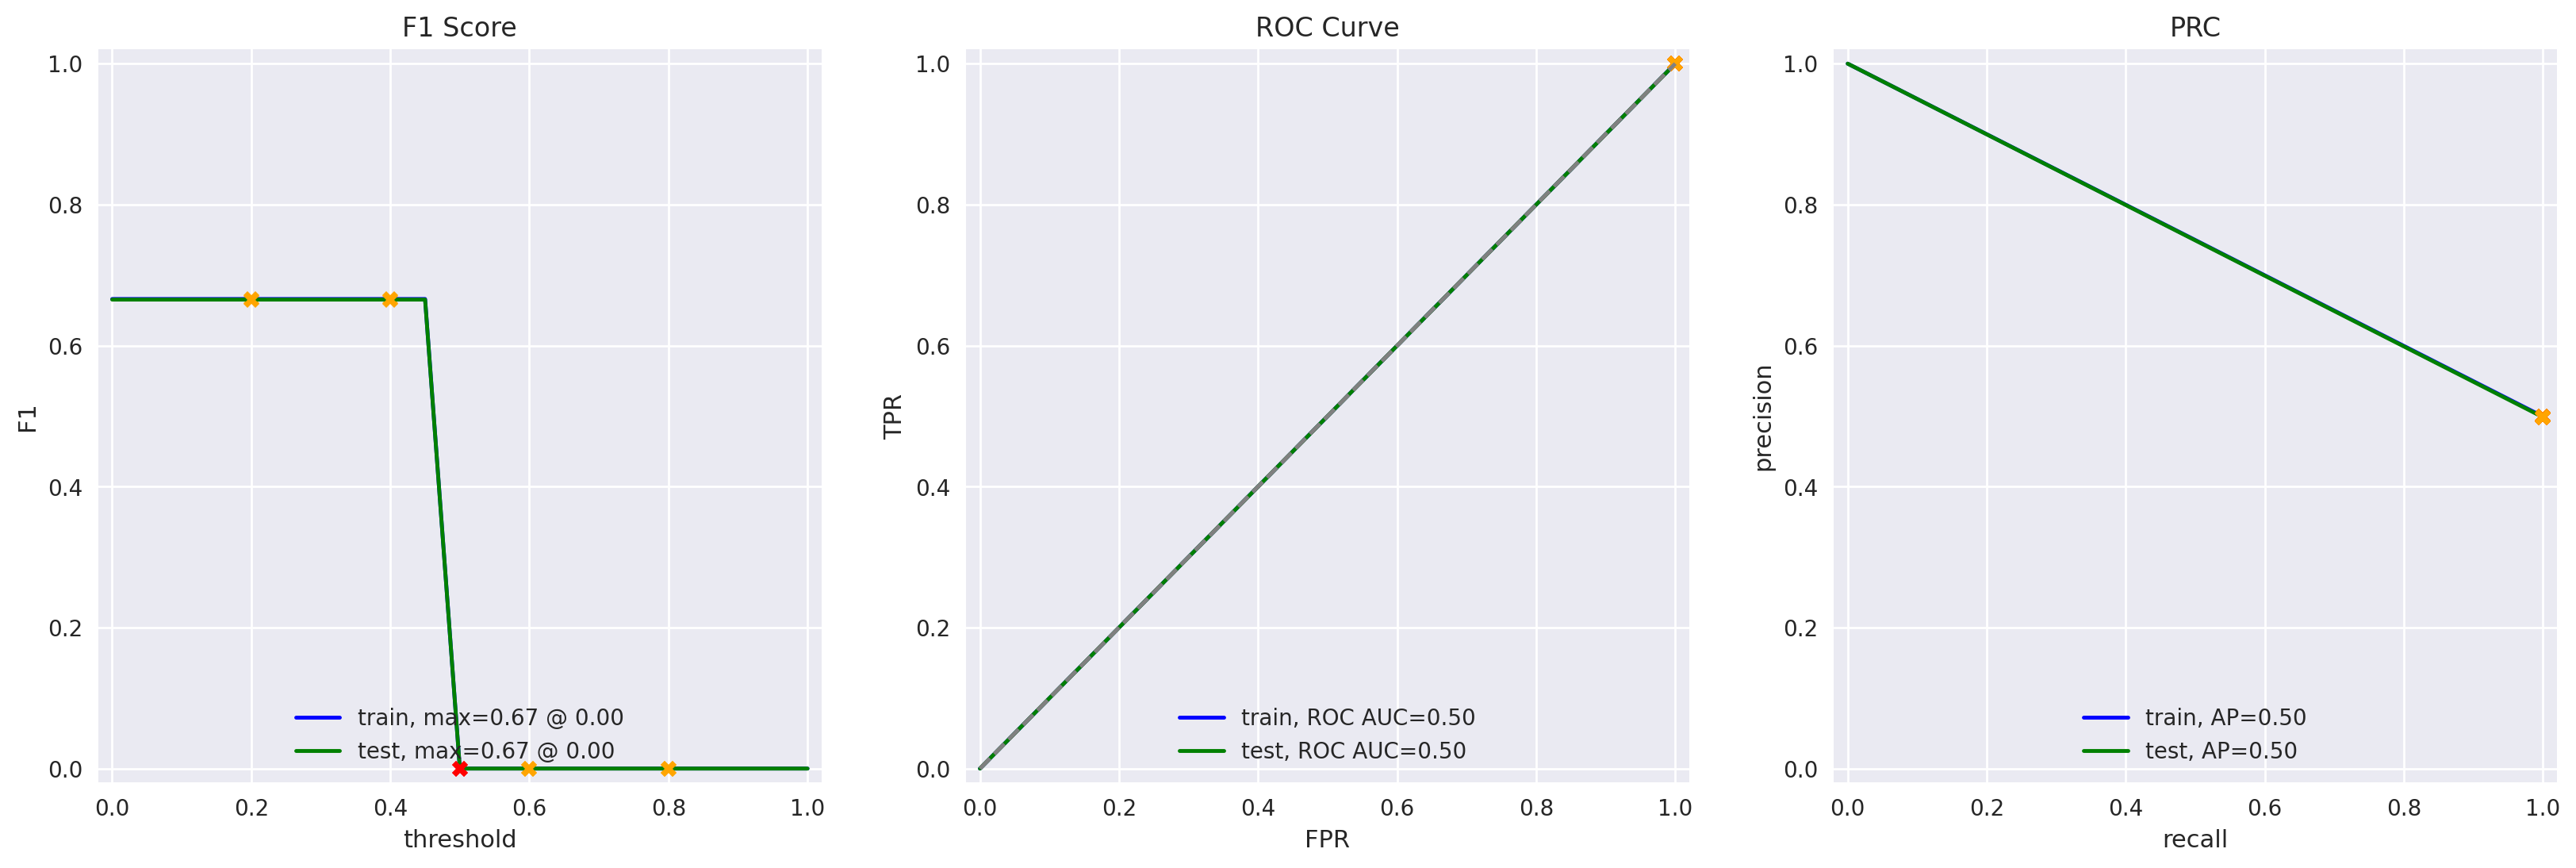

In [22]:
dummy = DummyClassifier(random_state=random_state)
dummy.fit(train_features, train_target)

evaluate_model(dummy, train_features, train_target, test_features, test_target)

Now we have a baseline to compare our models to.  The dummy model basically shows it is basically a coin toss if this model predicts if a review is positive or negative.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good. You can also check the result using different strategy values.
</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [23]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [24]:
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

train_features_1 = count_tf_idf.fit_transform(train_features)
test_features_1 = count_tf_idf.transform(test_features)

In [25]:
model_1 = LogisticRegression(random_state=random_state)
model_1.fit(train_features_1, train_target)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


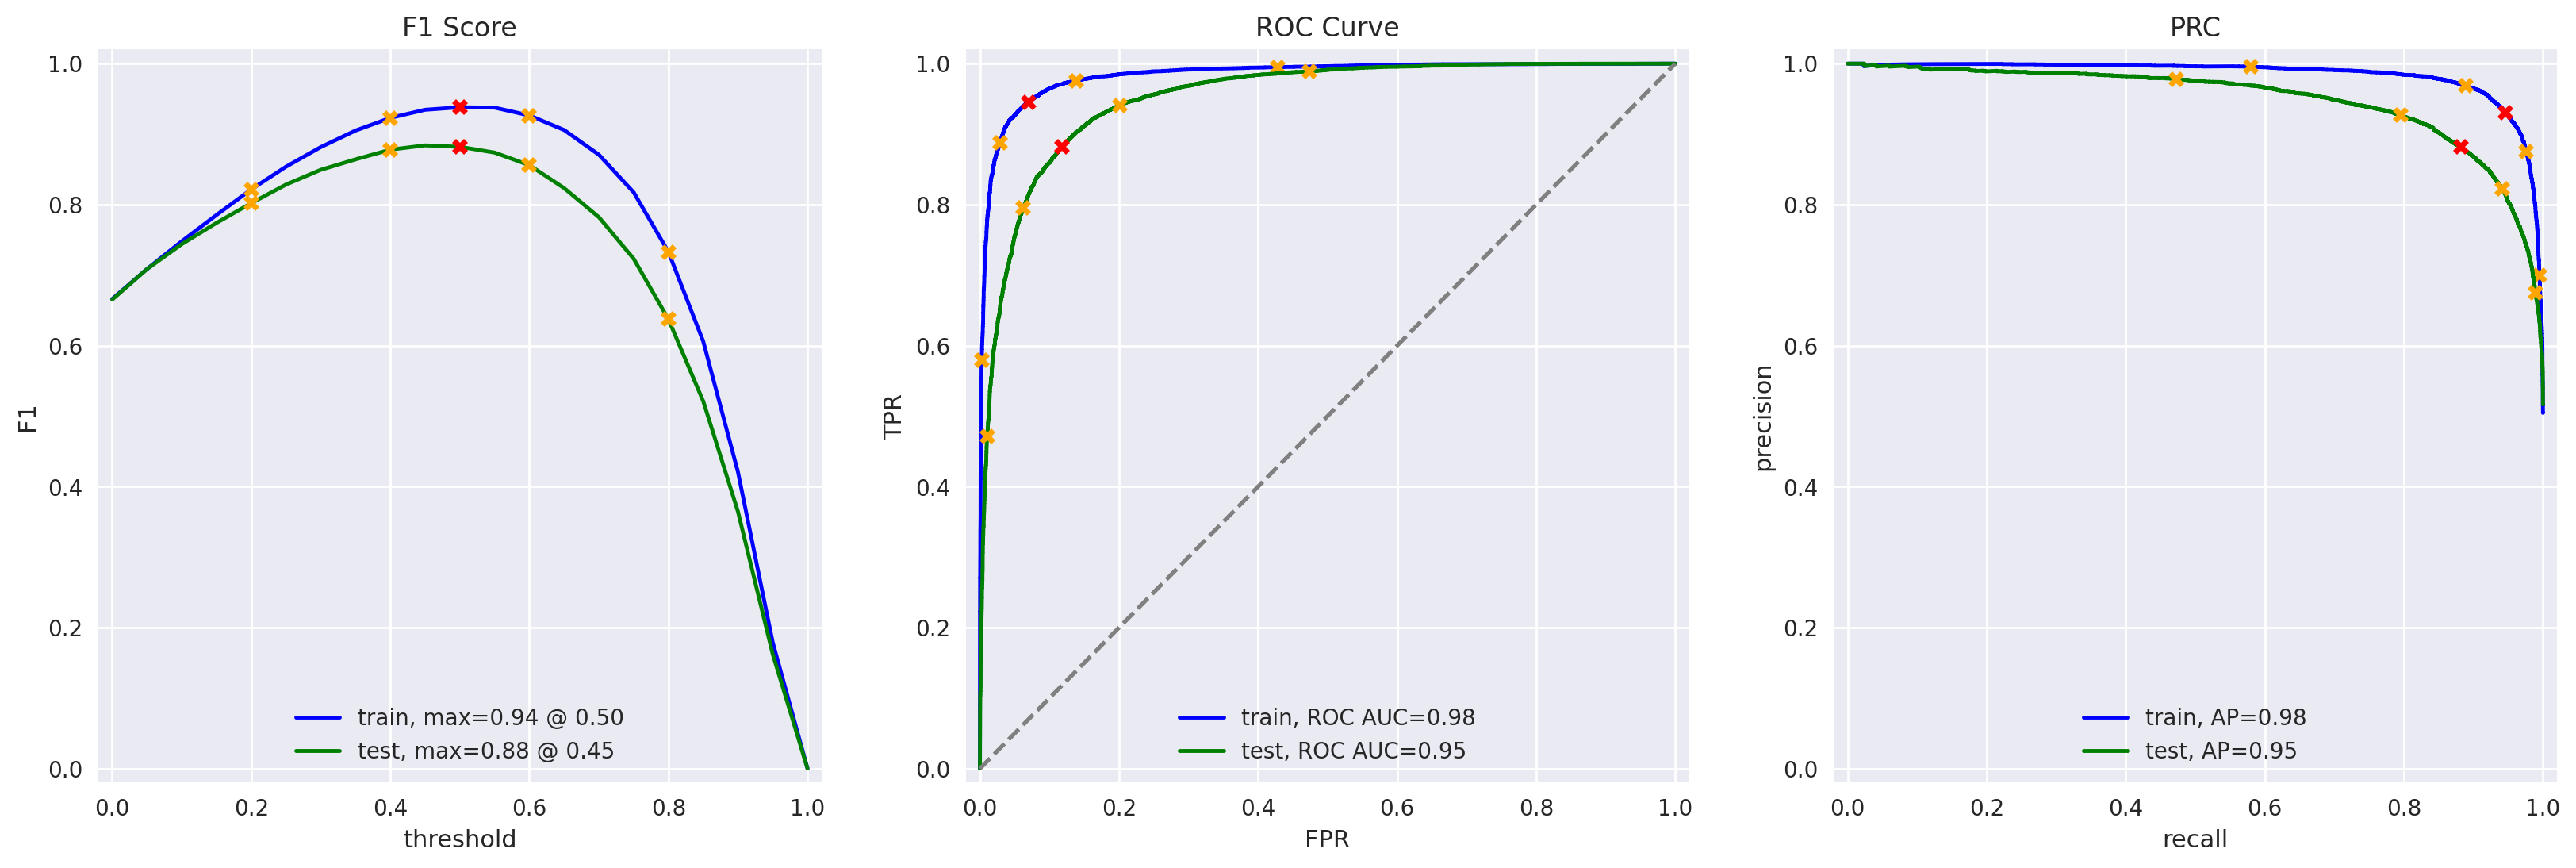

In [26]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

We can see that our Logistic Regression model performs very well and does a great job at predicting if a review is positive or negative.  Especially when we look at our benchmark F1_score of 0.85 it out performs that on both our training and test sets.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [27]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [28]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [29]:
df_reviews_train['review_norm_lemma'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_norm_lemma'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

In [30]:
stop_words = set(stopwords.words('english'))
count_tf_idf_2 = TfidfVectorizer(stop_words=stop_words)

train_features_2 = count_tf_idf_2.fit_transform(df_reviews_train['review_norm_lemma'])
test_features_2 = count_tf_idf_2.transform(df_reviews_test['review_norm_lemma'])

In [31]:
model_2 = LogisticRegression(random_state=random_state)
model_2.fit(train_features_2, train_target)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


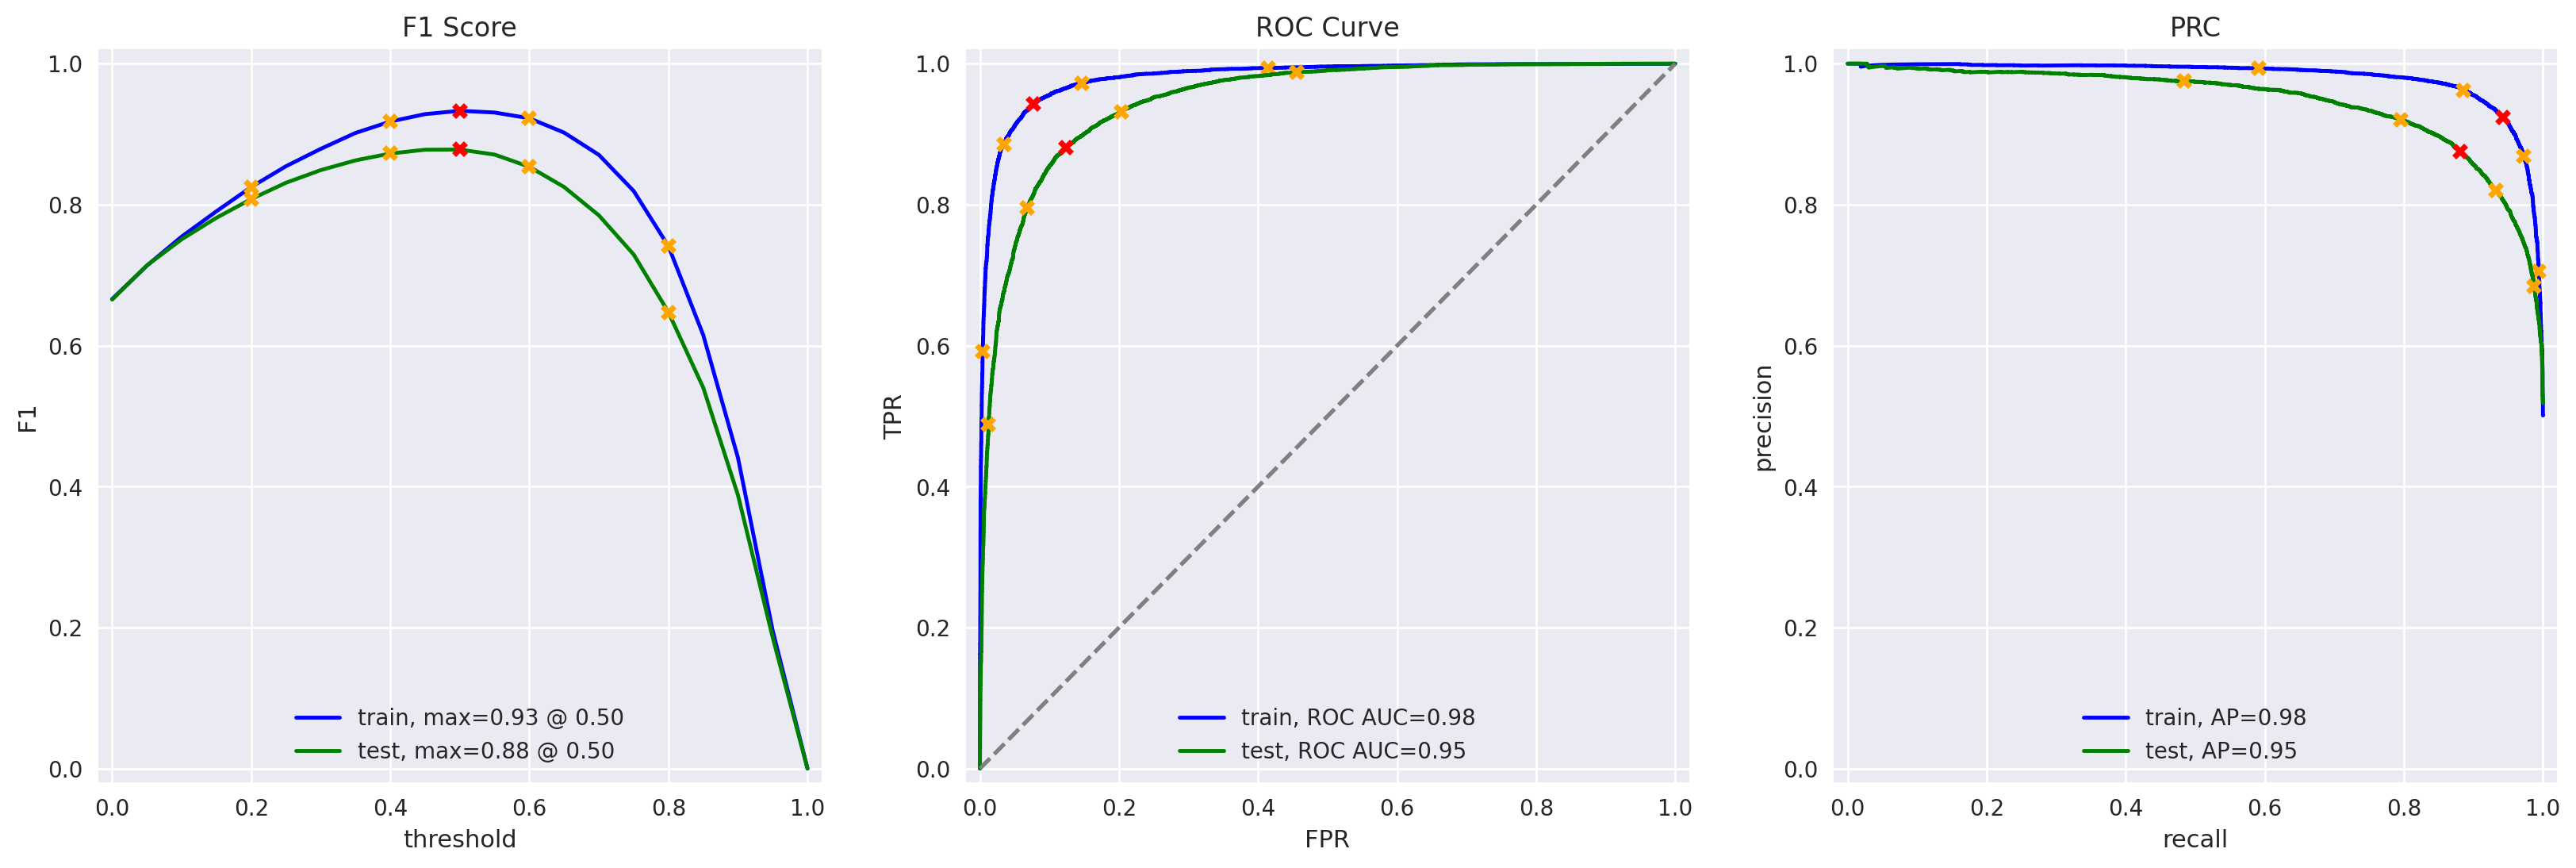

In [32]:
evaluate_model(model_2, train_features_2, train_target, test_features_2, test_target)

This model also does a good job predicting if reviews are  positive or negative based on the F1 score being greater than our threshold. It does however take longer to run than our first model and the training F1 score is .02 lower.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done!     
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [33]:
from lightgbm import LGBMClassifier

In [34]:
model_3 = LGBMClassifier(random_state=random_state)
model_3.fit(train_features_2, train_target)

LGBMClassifier(random_state=12345)

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


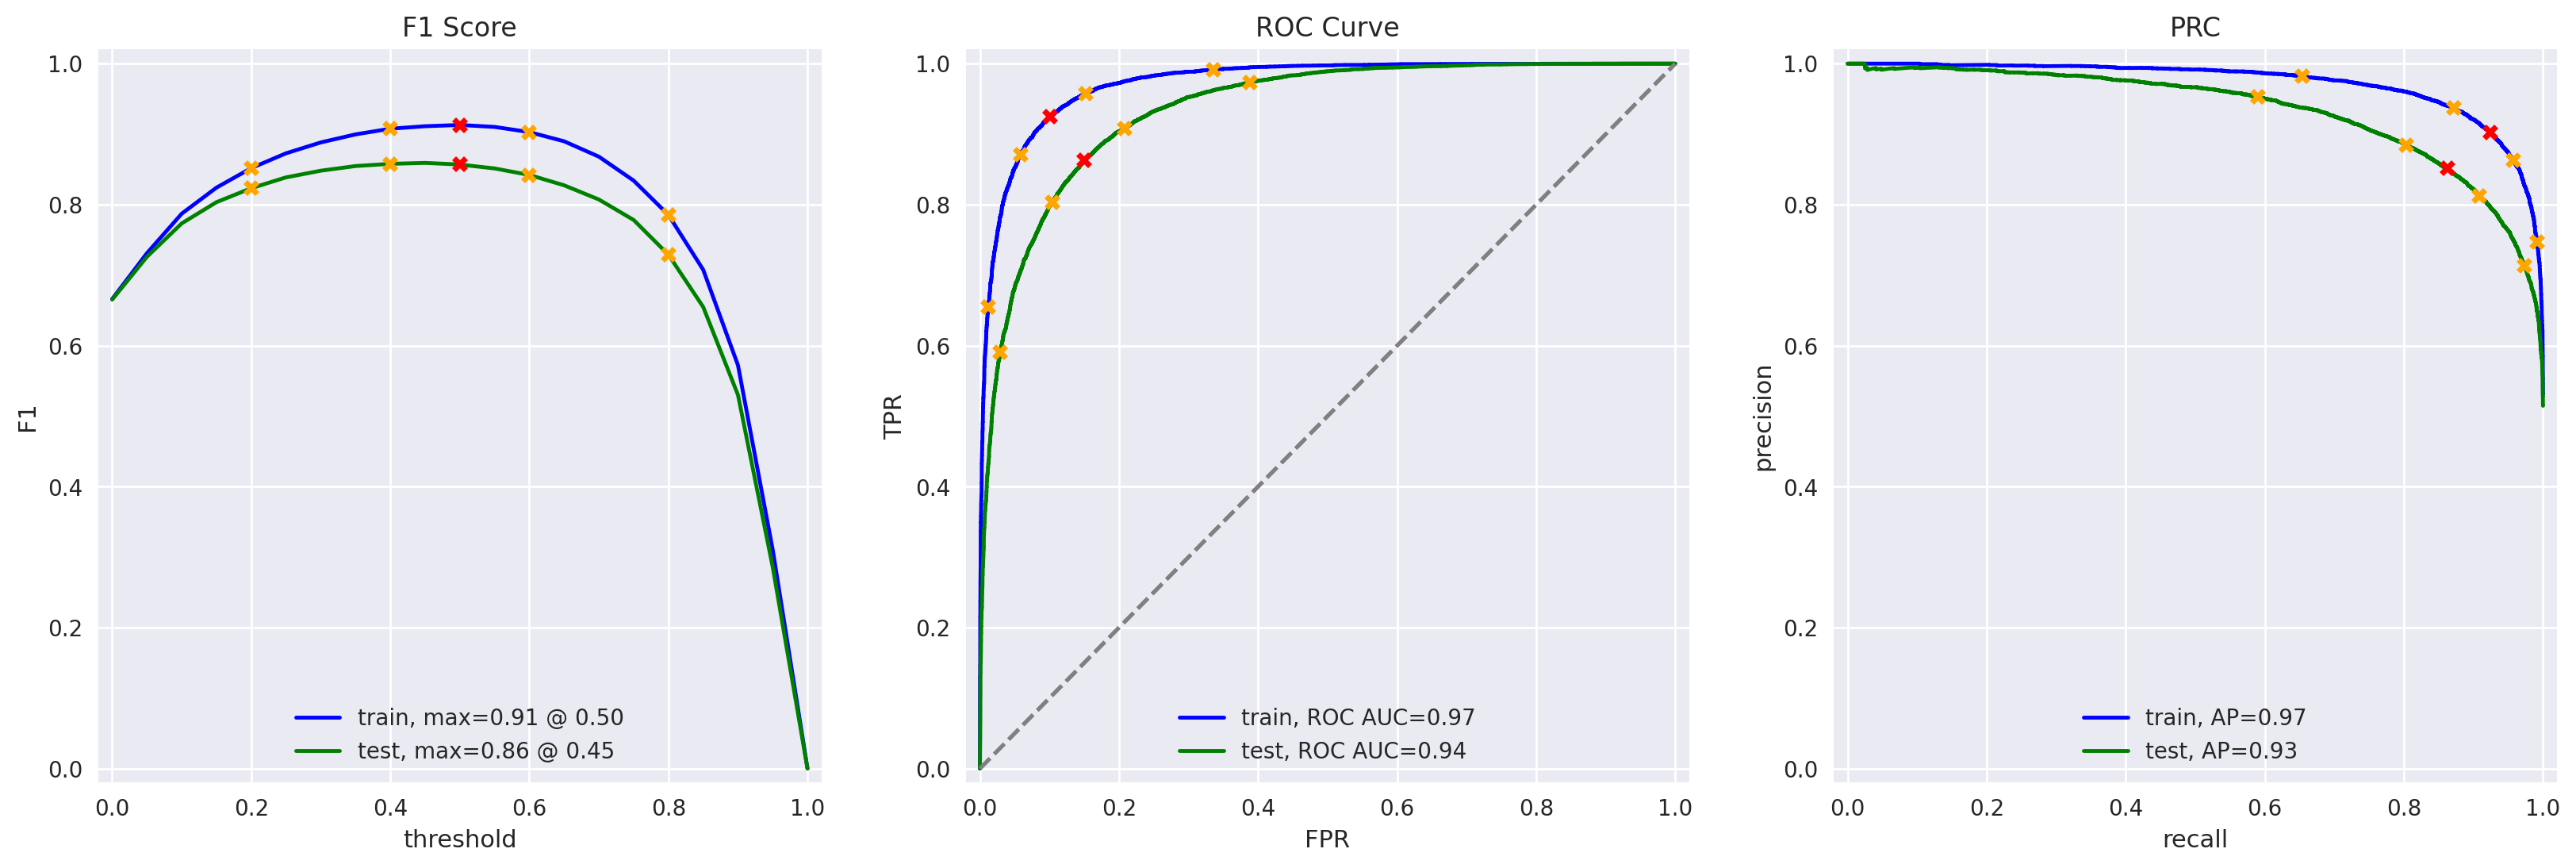

In [35]:
evaluate_model(model_3, train_features_2, train_target, test_features_2, test_target)

Our LGBM classifier model also does a good job, but does have lower F1scores than either of our logistic regression models. Based on these 3 models trained the TF-IDF model seems to be the best having some of the best F1 scores and running fairly quickly so it is efficient and accurate.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Very good.     
</div>

###  Model 9 - BERT

- Held on utilizing BERT d/t limited computational power as well as good results with our other models above. 

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

In [36]:
#import torch
#import transformers

In [37]:
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
#config = transformers.BertConfig.from_pretrained('bert-base-uncased')
#model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [38]:
#def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    #ids_list = []
    #attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    # <put your code here to create ids_list and attention_mask_list>
    
    #if force_device is not None:
        #device = torch.device(force_device)
    #else:
        #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    #model.to(device)
    #if not disable_progress_bar:
        #print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    #embeddings = []

    #for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        #ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <put your code here to create attention_mask_batch
            
        #with torch.no_grad():            
            #model.eval()
            #batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        #embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    #return np.concatenate(embeddings)

In [39]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
#train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [40]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [41]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Reviews

In [42]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(normalize)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",I did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",Well I was bored and felt asleep in the middle...
2,I was really fascinated with the movie,I was really fascinated with the movie
3,Even the actors looked really old and disinter...,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,I didn't expect the reboot to be so good Write...
5,"The movie had its upsides and downsides, but I...",The movie had its upsides and downsides but I ...
6,What a rotten attempt at a comedy. Not a singl...,What a rotten attempt at a comedy Not a single...
7,Launching on Netflix was a brave move & I real...,Launching on Netflix was a brave move I really...


### Model 2

In [43]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.14:  I did not simply like it not my kind of movie
0.17:  Well I was bored and felt asleep in the middle of the movie
0.54:  I was really fascinated with the movie
0.12:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.31:  I didn't expect the reboot to be so good Writers really cared about the source material
0.46:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.03:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.83:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


As you can see each line gives a probability of how likely it is to be positive. Rows with low probabilities of positivity include things like "I did not like", "disinterested", "rotten", and "annoying".  All words very much associated with a negative review. Overall the predictions from this model seem to be fairly correct except for the 6th line that seems to be a positive review, but had a lower probability.

### Model 3

In [44]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(count_tf_idf_2.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.21:  I did not simply like it not my kind of movie
0.12:  Well I was bored and felt asleep in the middle of the movie
0.50:  I was really fascinated with the movie
0.10:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.27:  I didn't expect the reboot to be so good Writers really cared about the source material
0.48:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.03:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.92:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


Again our second model did a good job with it's predictions.  It seems like the 5th line is tricky for our models likely because of the word "didn't" having a more negative connotation.

### Model 4

In [45]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_2.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.58:  I did not simply like it not my kind of movie
0.32:  Well I was bored and felt asleep in the middle of the movie
0.61:  I was really fascinated with the movie
0.35:  Even the actors looked really old and disinterested and they got paid to be in the movie What a soul
0.70:  I didn't expect the reboot to be so good Writers really cared about the source material
0.70:  The movie had its upsides and downsides but I feel like overall it's a decent flick I could see myse
0.23:  What a rotten attempt at a comedy Not a single joke lands everyone acts annoying and loud even kids 
0.76:  Launching on Netflix was a brave move I really appreciate being able to binge on episode after episo


This model was the only one that didn't have any strong probabilities indicating more confidence in a review being more positive or negative.  Although it's probabilities weren't as strong they all seemed to lean the right way and it was the only model that correctly identified that the 5th line was a positive review. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Nice results! 
</div>


### Model 9

- Again skipped this portion 

In [46]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
    #print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusions

In conclusion we were able to train and test 3 models all with good success in correctly predicting if a review is positive or negative. This can help the Film Junky Union correctly classify the reviews which can help with ratings. The TF-IDF and logistic regression model demonstrated the greatest accuracy in predicting this with the highest F1-Score over our threshold of 0.85. It also was efficient as the model was trained quickly.  Unfortunately, due to limitations in my machines computational power, we were unable to train the BERT model and test it, but I believe it could have further improved our models.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions